## ****Description****
##### This is the code used to make the a Pandas dataframe that contains two columns:
###### "FolderName": Names of the folder where each array 
###### "ImageData": 2D arrays of each image(was originally jpeg)
 

In [11]:
# All Necessry Packages
import os
import pandas as pd
from PIL import Image  # Make sure you have the PIL/Pillow library installed
import numpy as np
# Packages used for testing
import time
import matplotlib.pyplot as plt

In [12]:
### List of the Folder
###(Includes: 'Achaemenid architecture','American craftsman style', 'American Foursquare architecture', 'Ancient Egyptian architecture', 'Art Deco architecture')
folder_paths = ['Achaemenid architecture','American craftsman style', 'American Foursquare architecture', 'Ancient Egyptian architecture', 'Art Deco architecture',folder_paths = ['Achaemenid architecture','American craftsman style', 'American Foursquare architecture', 'Ancient Egyptian architecture', 'Art Deco architecture', 'Art Nouveau architecture', 'Baroque architecture', 'Bauhaus architecture', 'Beaux-Arts architecture', 'Byzantine architecture', 'Chicago school architecture', 'Colonial architecture', 'Deconstructivism', 'Edwardian architecture', 'Georgian architecture', 'Gothic architecture', 'Greek Revival architecture', 'International style', 'Novelty architecture', 'Palladian architecture', 'Postmodern architecture', 'Queen Anne architecture', 'Romanesque architecture' ]

#### The initalization of dataframe takes around 100 Seconds

In [6]:
start = time.time()
data = []

for folder in folder_paths:
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.lower().endswith('.jpg'):
                folder_name = os.path.basename(root)
                file_path = os.path.join(root, file)

                # Open the image and convert it to a NumPy array
                with Image.open(file_path) as img:
                    img_array = np.array(img)

                data.append((folder_name, img_array))

df = pd.DataFrame(data, columns=['FolderName', 'ImageData'])
end = time.time()

In [13]:
print(end - start)

14.244325637817383


In [14]:
df.size

4180

In [15]:
df['ImageData'][0]
array_2d = np.array(df['ImageData'][0])

# Check the shape of the 2D array
shape_of_array = array_2d.shape
print(shape_of_array)

(442, 1000, 3)


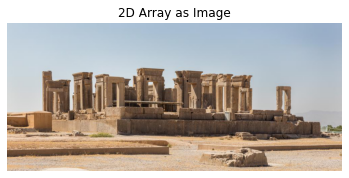

In [16]:
# Display the 2D array as an image
plt.imshow(df['ImageData'][0], cmap='gray')  # 'gray' colormap for grayscale images
plt.title('2D Array as Image')
plt.axis('off')  # Hide the axis
plt.show()

To be able to export the table uncomment and run following:

In [17]:
#start = time.time()
#csv_filename = 'trial.csv'
#df.to_csv(csv_filename, index=False)
#end = time.time()
#print(end - start, '\n', f)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [19]:
df_1D = .ravel()

data = np.zeros((0, 2))

SyntaxError: invalid syntax (<ipython-input-19-98794d15d323>, line 1)

In [21]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Constants
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32
EPOCHS = 10
RESIZED_IMAGES_DIR = "resized_images"  # Directory where resized images will be saved

# Function to resize images
def resize_and_save_image(image, folder_name, image_index):
    # Ensure the image is a 3D array
    if image.ndim != 3:
        # Convert the image to a 3D array with 3 channels
        image = np.stack((image,)*3, axis=-1)
    
    # Resize the image
    image_resized = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH]).numpy()
    image_resized = Image.fromarray((image_resized * 255).astype(np.uint8))  # Convert back to an image

    # Save the image
    if not os.path.exists(RESIZED_IMAGES_DIR):
        os.makedirs(RESIZED_IMAGES_DIR)
    image_path = os.path.join(RESIZED_IMAGES_DIR, f"{folder_name}_{image_index}.png")
    image_resized.save(image_path)
    
    return image_path

# Resize images and save them to disk
df['image_path'] = [
    resize_and_save_image(image, folder_name, image_index) 
    for image, folder_name, image_index in zip(df['ImageData'], df['FolderName'], range(len(df)))
]

# Now, 'image_path' column in 'df' contains the paths to the resized images.

# Prepare the Dataset
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create training and validation generators
train_generator = datagen.flow_from_dataframe(
    df,
    x_col='image_path',
    y_col='FolderName',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    df,
    x_col='image_path',
    y_col='FolderName',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# 3. Create the Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    tf.keras.layers.MaxPooling2D(),
    # Additional Convolutional and Pooling layers can be added here
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(folder_paths), activation='softmax')  # Change to the number of classes you have
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

Found 1672 validated image filenames belonging to 5 classes.
Found 418 validated image filenames belonging to 5 classes.
Epoch 1/10
52/52 [==============================] - 32s 593ms/step - loss: 12.1143 - accuracy: 0.2804 - val_loss: 14.3382 - val_accuracy: 0.0144
Epoch 2/10
52/52 [==============================] - 35s 680ms/step - loss: 0.7167 - accuracy: 0.8446 - val_loss: 20.2532 - val_accuracy: 0.0000e+00
Epoch 3/10
52/52 [==============================] - 41s 790ms/step - loss: 0.1600 - accuracy: 0.9859 - val_loss: 24.5222 - val_accuracy: 0.0072
Epoch 4/10
52/52 [==============================] - 44s 853ms/step - loss: 0.0464 - accuracy: 0.9997 - val_loss: 25.8888 - val_accuracy: 0.0024
Epoch 5/10
52/52 [==============================] - 45s 868ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 27.5435 - val_accuracy: 0.0312
Epoch 6/10
52/52 [==============================] - 44s 861ms/step - loss: 0.0086 - accuracy: 0.9997 - val_loss: 26.2808 - val_accuracy: 0.0000e+00
Epoch 